Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


In [1]:
import numpy as np

In [2]:
import sys
#update the path to include the hw_data directory
path = "/Users/tinaryu/stat_gen/hw_data"

sys.path.append(path) 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [3]:
from PowerIteration_Functions import *

Question: Does performance improve with increased sample size?

In [4]:
YRI = read_geno_pop_chr('YRI',2) #northern European, USA
LWK = read_geno_pop_chr('LWK',2) ##Yoruba, Nigeria
MKK = read_geno_pop_chr('MKK',2) #Chinese, China

In [5]:
def GetCombinedGenoYRI_LWK_MKK(YRI, LWK, MKK, n):
    # Slice the first n columns of each array
    YRI_subset = YRI[:, :n]
    LWK_subset = LWK[:, :n]
    MKK_subset = MKK[:, :n]

    # Horizontally stack the sliced arrays
    combined = np.ma.hstack([YRI_subset, LWK_subset, MKK_subset])
    return combined


In [6]:
np.random.seed(42)


In [7]:
import matplotlib.pyplot as plt
def GetPCandPlot_YRILWKMKK(n):

    combined = GetCombinedGenoYRI_LWK_MKK(YRI, LWK, MKK, n)
    top10PCs = RunPowerIteration10PCs(combined)

    DistanceRatio = GetDistanceRatio(top10PCs, 3, n)
    # Define indices for each population
    YRI_indices = range(0, n)
    LWK_indices = range(n, 2*n)
    MKK_indices = range(2*n, 3*n)
    # Plot each population with a different color
    plt.figure(figsize=(6, 5))

    # YRI Population
    plt.scatter(top10PCs[0][YRI_indices], top10PCs[1][YRI_indices], c='blue', label='YRI', edgecolor='k')
    # LWK Population
    plt.scatter(top10PCs[0][LWK_indices], top10PCs[1][LWK_indices], c='green', label='LWK', edgecolor='k')
    # MKK Population
    plt.scatter(top10PCs[0][MKK_indices], top10PCs[1][MKK_indices], c='red', label='MKK', edgecolor='k')

    # Add labels and title
    plt.title("PCA Plot between top PCs of YRI, MKK, and LWK samples (n = " + str(n) + ")")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    return DistanceRatio
    

Power iteration: converged at iter=109
Power iteration: converged at iter=361
Power iteration: converged at iter=441
Power iteration: converged at iter=2
Power iteration: converged at iter=732
Power iteration: converged at iter=1085
Power iteration: converged at iter=1
Power iteration: converged at iter=3319
Power iteration: converged at iter=1
Power iteration: converged at iter=699


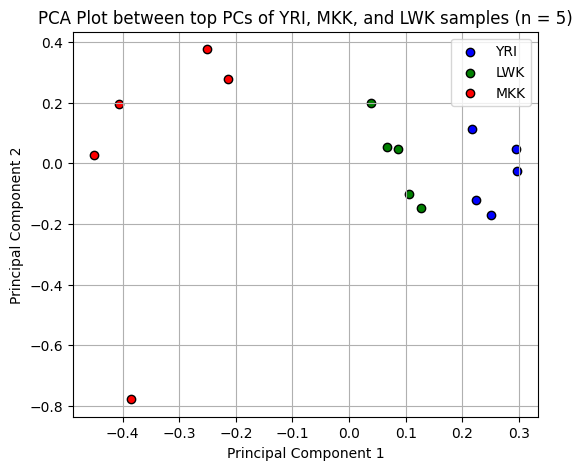

Power iteration: converged at iter=72
Power iteration: converged at iter=246
Power iteration: converged at iter=2
Power iteration: converged at iter=178
Power iteration: converged at iter=543
Power iteration: converged at iter=2
Power iteration: converged at iter=621
Power iteration: converged at iter=2274
Power iteration: converged at iter=2
Power iteration: converged at iter=908


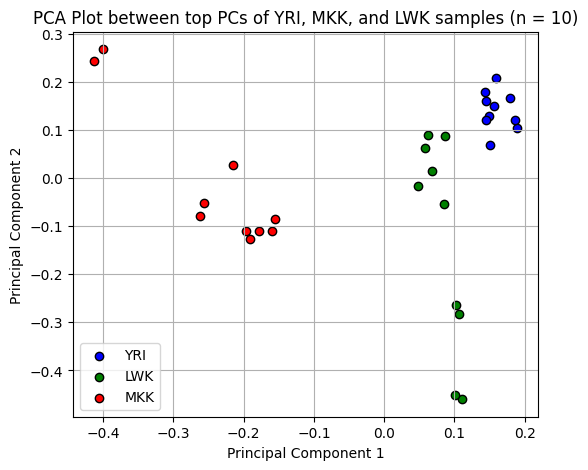

Power iteration: converged at iter=22
Power iteration: converged at iter=661
Power iteration: converged at iter=2
Power iteration: converged at iter=650
Power iteration: converged at iter=1
Power iteration: converged at iter=396
Power iteration: converged at iter=1585
Power iteration: converged at iter=1
Power iteration: converged at iter=400
Power iteration: converged at iter=325


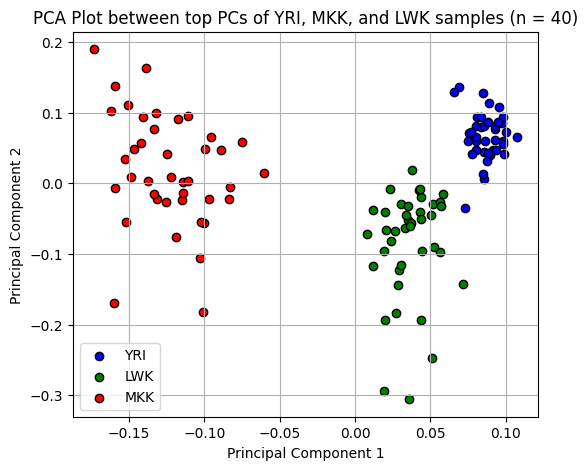

Power iteration: converged at iter=16
Power iteration: converged at iter=204
Power iteration: converged at iter=49
Power iteration: converged at iter=309
Power iteration: converged at iter=1
Power iteration: converged at iter=709
Power iteration: converged at iter=1
Power iteration: converged at iter=1340
Power iteration: converged at iter=1
Power iteration: converged at iter=1087


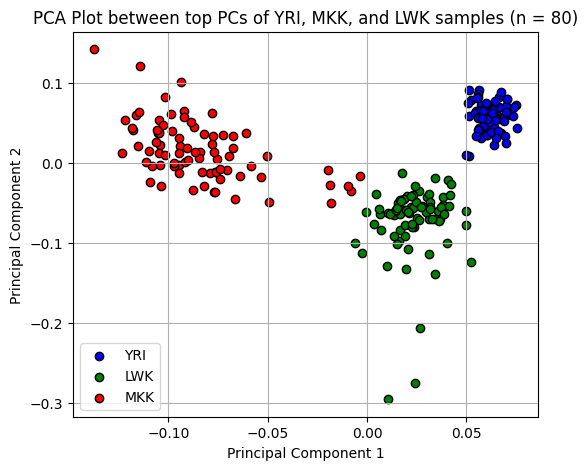

In [8]:
ns = [5,10,40,80]
distances = {}
for n in ns:
    DistanceRatio = GetPCandPlot_YRILWKMKK(n)
    distances[n] = DistanceRatio

In [9]:
df = pd.DataFrame(distances).T
df.columns = ['YRI', 'LWK', 'MKK']
df['mean'] = df.mean(axis=1)
df

,YRI,LWK,MKK,mean
5,3.814133,2.699015,1.465611,2.659586
10,9.592977,1.633445,2.817485,4.681302
40,6.779131,2.867529,2.958759,4.201806
80,9.179447,4.379485,3.814697,5.791210
